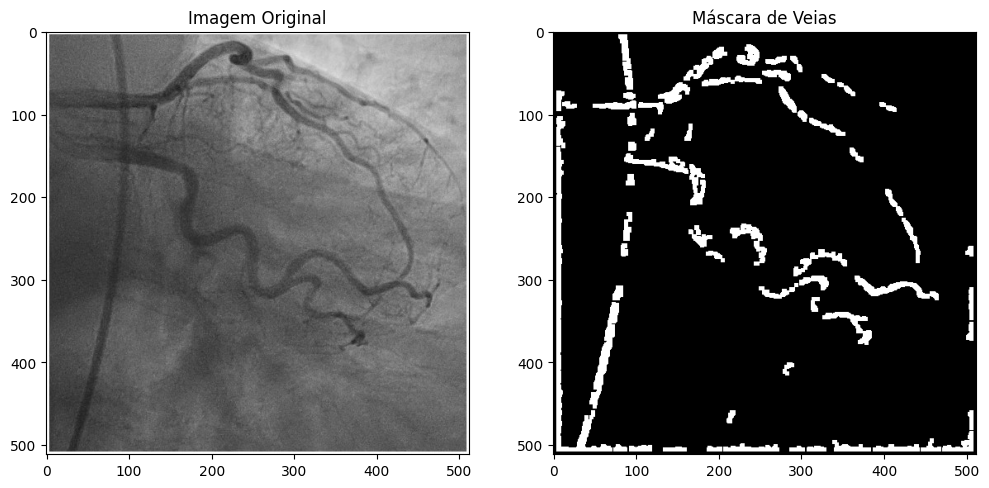

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class AngiogramProcessor:
    def __init__(self, image_path):
        self.image_path = image_path
        self.image_angiograma = None
        self.imagem_cinza = None
        self.imagem_cinza_equalizada = None
        self.imagem_suavizada = None
        self.mascara_veias = None

    def load_image(self):
        self.image_angiograma = cv2.imread(self.image_path)

    def convert_to_grayscale(self):
        self.imagem_cinza = cv2.cvtColor(self.image_angiograma, cv2.COLOR_BGR2GRAY)

    def equalize_histogram(self):
        self.imagem_cinza_equalizada = cv2.equalizeHist(self.imagem_cinza)

    def smooth_image(self):
        self.imagem_suavizada = cv2.GaussianBlur(self.imagem_cinza_equalizada, (5, 5), 0)

    def threshold_and_process(self):
        self.mascara_veias = cv2.adaptiveThreshold(
            self.imagem_suavizada, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
        )
        self.mascara_veias = cv2.bitwise_not(self.mascara_veias)
        kernel = np.ones((5, 5), np.uint8)
        self.mascara_veias = cv2.erode(self.mascara_veias, kernel, iterations=1)
        self.mascara_veias = cv2.dilate(self.mascara_veias, kernel, iterations=1)

    def show_original_image(self):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(self.image_angiograma, cv2.COLOR_BGR2RGB))
        plt.title('Imagem Original')

    def show_veins_mask(self):
        plt.subplot(1, 2, 2)
        plt.imshow(self.mascara_veias, cmap='gray')
        plt.title('Máscara de Veias')

    def keep_connected_components(self, min_area_threshold):
        # Encontre os componentes conectados na máscara de veias
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(self.mascara_veias, connectivity=4)

        # Crie uma máscara em branco
        connected_mask = np.zeros_like(self.mascara_veias, dtype=np.uint8)

        # Itere pelos componentes conectados e mantenha apenas os maiores
        for label in range(1, num_labels):
            area = stats[label, cv2.CC_STAT_AREA]
            if area > min_area_threshold:
                connected_mask[labels == label] = 255

        # Aplique uma operação de abertura para remover pequenos detalhes
        kernel = np.ones((5, 5), np.uint8)
        connected_mask = cv2.morphologyEx(connected_mask, cv2.MORPH_OPEN, kernel)

        # Atribua a máscara conectada de volta à máscara de veias
        self.mascara_veias = connected_mask

    def process_and_show(self):
        self.load_image()
        self.convert_to_grayscale()
        self.equalize_histogram()
        self.smooth_image()
        self.threshold_and_process()
        self.show_original_image()
        self.keep_connected_components(min_area_threshold=100)  # Ajuste o valor do limiar conforme necessário
        self.show_veins_mask()
        plt.show()

# Exemplo de uso:
if __name__ == "__main__":
    image_path = '/kaggle/input/coronary-angiography-print/1 (10).jpg'
    angiogram_processor = AngiogramProcessor(image_path)
    angiogram_processor.process_and_show()


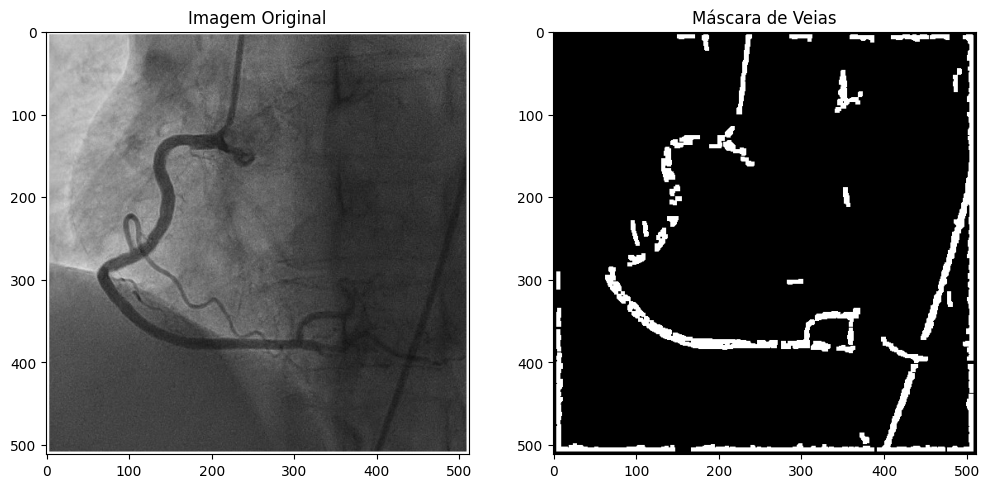

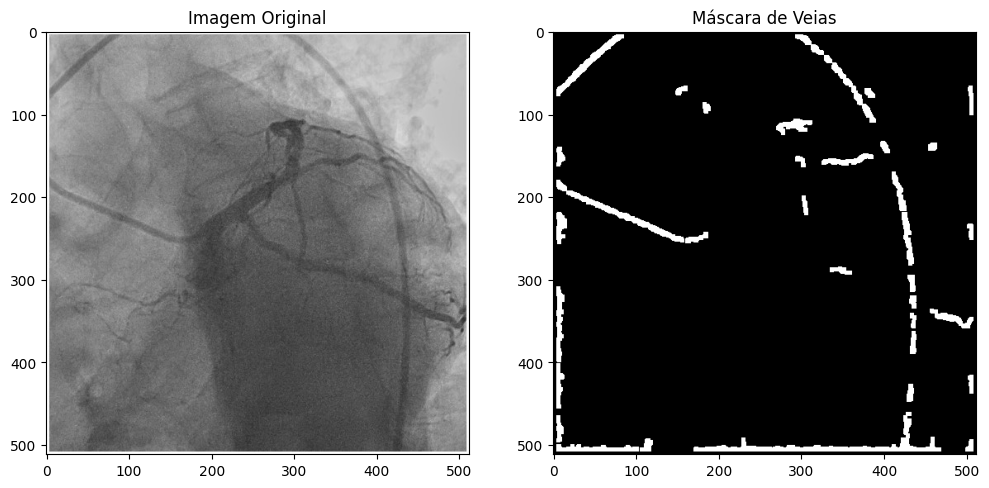

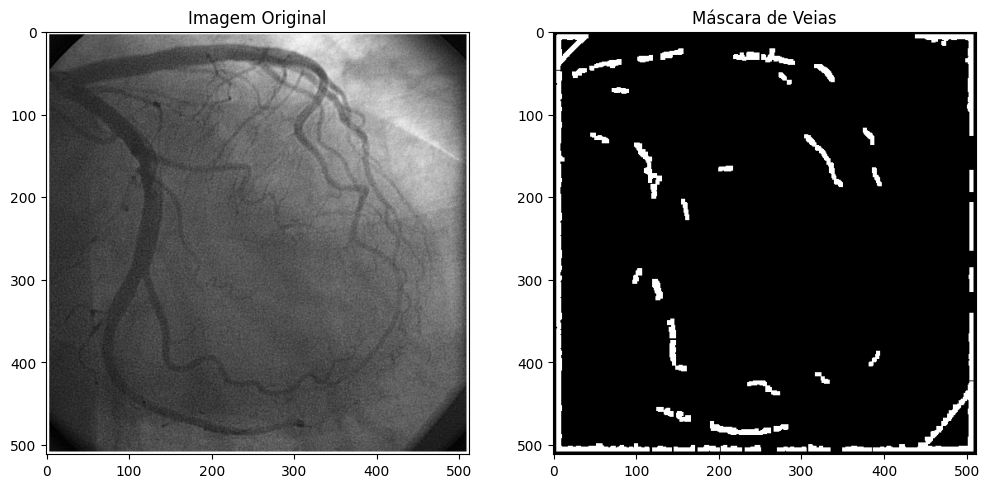

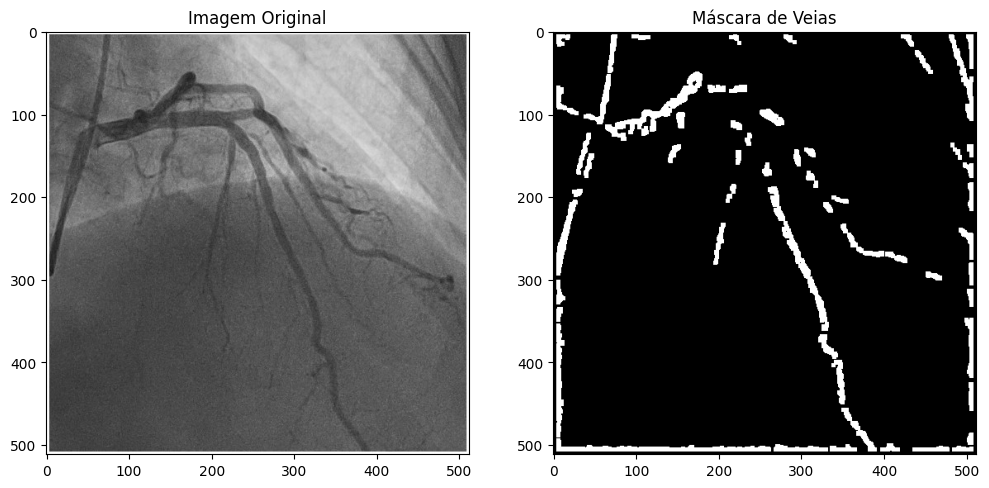

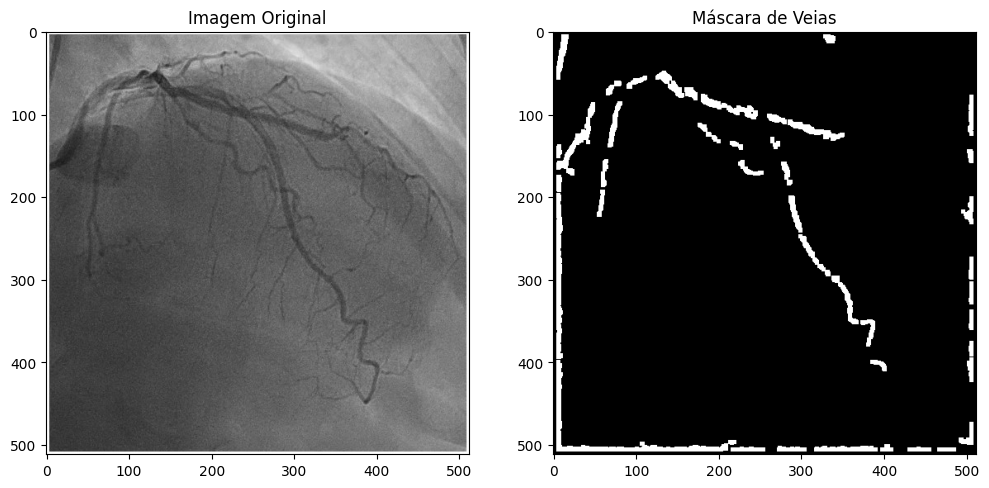

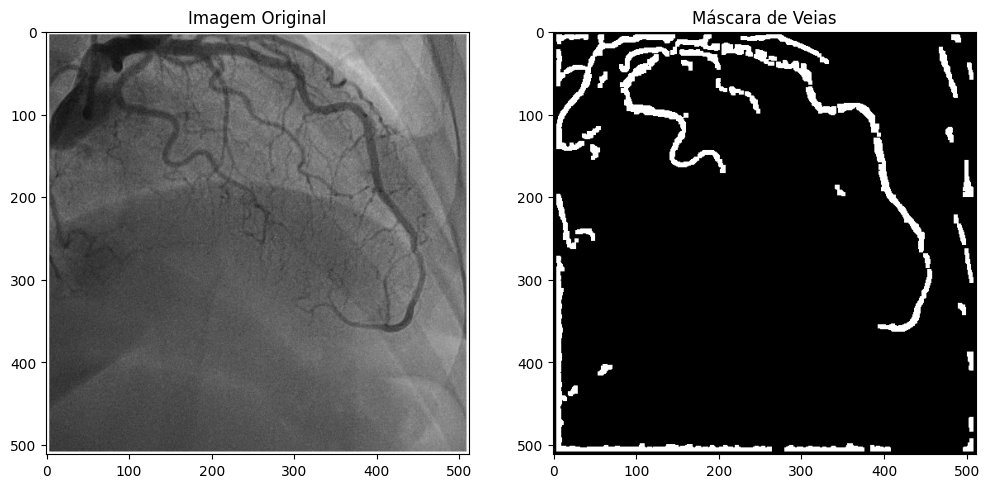

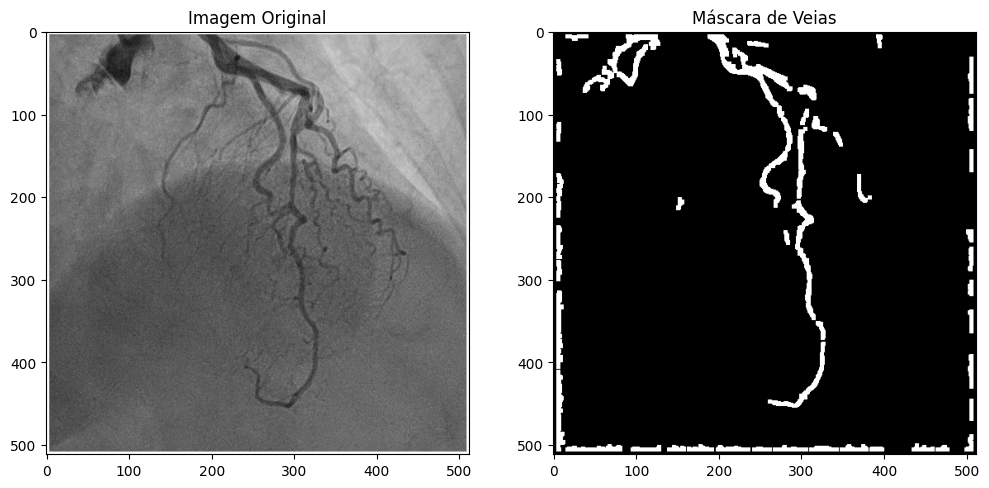

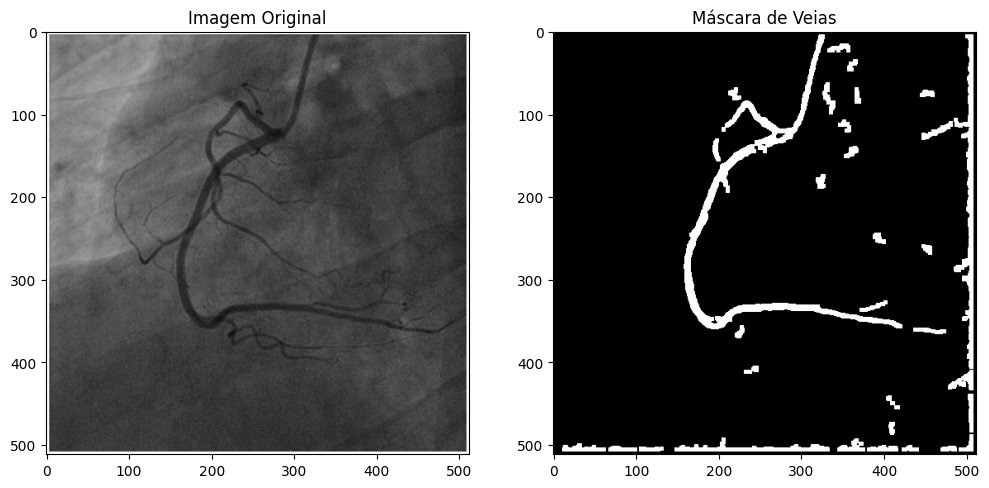

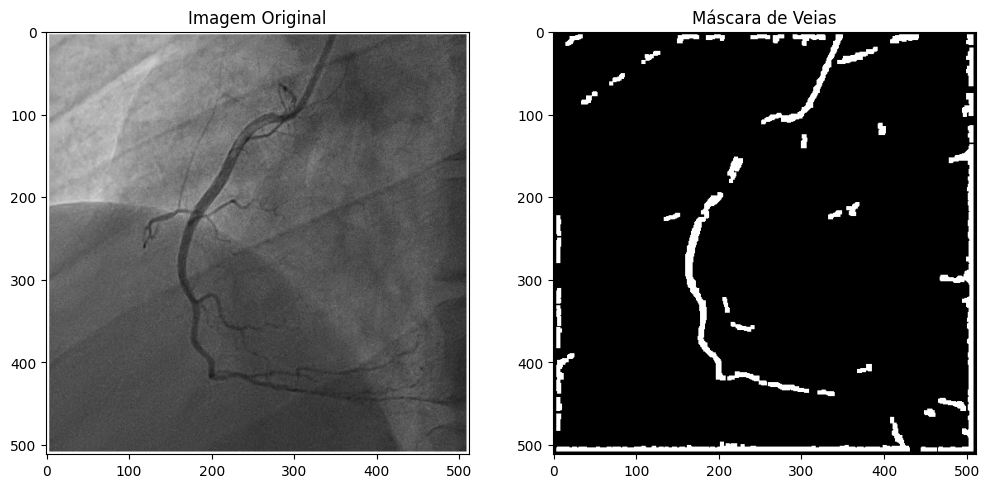

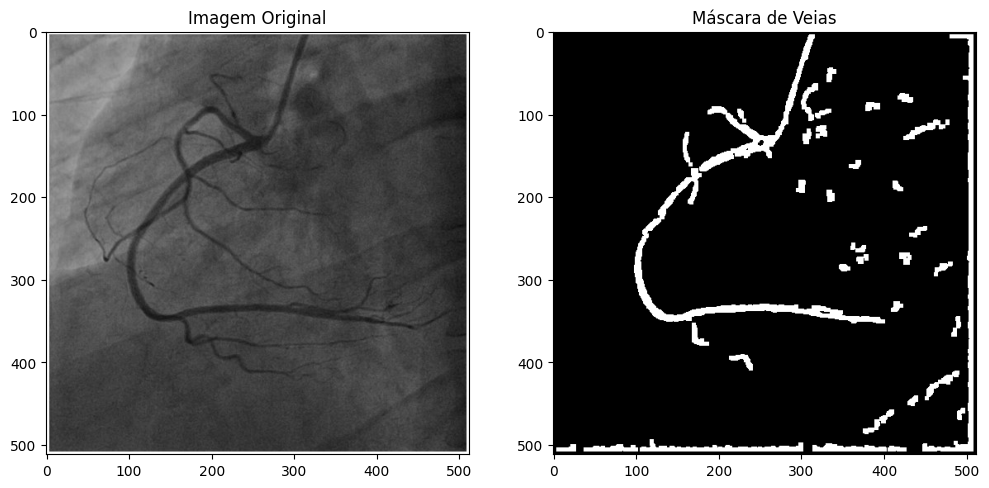

Processamento das 10 primeiras imagens concluído e imagens salvas em um arquivo zip: /kaggle/working/processed_angiograms.zip


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

# class AngiogramProcessor:
#     # O código da classe AngiogramProcessor que você já tinha permanece inalterado.

# Diretório de entrada das imagens
input_directory = '/kaggle/input/coronary-angiography-print/'

# Diretório de saída para as imagens processadas
output_directory = '/kaggle/working/processed_angiograms/'

# Crie o diretório de saída se ele não existir
os.makedirs(output_directory, exist_ok=True)

# Crie um arquivo zip para armazenar as imagens processadas
zip_file_path = '/kaggle/working/processed_angiograms.zip'
with zipfile.ZipFile(zip_file_path, 'w') as zip_file:
    # Lista de nomes de arquivos das 10 primeiras imagens
    image_files = os.listdir(input_directory)[:10]

    # Itere sobre as imagens selecionadas
    for filename in image_files:
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Construa o caminho completo para a imagem de entrada
            input_image_path = os.path.join(input_directory, filename)

            # Processar a imagem
            angiogram_processor = AngiogramProcessor(input_image_path)
            angiogram_processor.process_and_show()

            # Construa o caminho completo para a imagem processada
            output_image_path = os.path.join(output_directory, filename)

            # Salve a imagem processada
            cv2.imwrite(output_image_path, angiogram_processor.mascara_veias)

            # Adicione a imagem processada ao arquivo zip
            zip_file.write(output_image_path, arcname=filename)

# Finalizado
print("Processamento das 10 primeiras imagens concluído e imagens salvas em um arquivo zip:", zip_file_path)
